In [33]:
#This file documents the codes used for the final iteration of the housing project

In [41]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('iteration4').getOrCreate()

# 2. Data Preparation

## 2.1 Data Collection

In [42]:
#load the data file
df = spark.read.option("header", "true").option("inferSchema", "true").csv('Iteration 4 Datasets/Beijing Housing.csv')
df_missing = spark.read.option("header", "true").option("inferSchema", "true").csv('Iteration 4 Datasets/Missing Data.csv')

In [36]:
#Verify data
spark.conf.set("spark.sql.debug.maxToStringFields", 100)
df.show()
df_missing.show()

+--------------------+------------+----------+---------+-------------+----------+----+---------+----------+-----+------+----------+-----------+-------+--------+-----+------------+----------------+-------------------+-----------------+-----------+--------+-----------------+------+--------+----------------+
|                 url|          id|       Lng|      Lat|          Cid| tradeTime| DOM|followers|totalPrice|price|square|livingRoom|drawingRoom|kitchen|bathRoom|floor|buildingType|constructionTime|renovationCondition|buildingStructure|ladderRatio|elevator|fiveYearsProperty|subway|district|communityAverage|
+--------------------+------------+----------+---------+-------------+----------+----+---------+----------+-----+------+----------+-----------+-------+--------+-----+------------+----------------+-------------------+-----------------+-----------+--------+-----------------+------+--------+----------------+
|https://bj.lianji...|101084782030|116.475489| 40.01952|1111027376244|2016-08-0

In [43]:
pandas_df = df.toPandas()
print(pandas_df)

                                                      url            id  \
0       https://bj.lianjia.com/chengjiao/101084782030....  101084782030   
1       https://bj.lianjia.com/chengjiao/101086012217....  101086012217   
2       https://bj.lianjia.com/chengjiao/101086041636....  101086041636   
3       https://bj.lianjia.com/chengjiao/101086406841....  101086406841   
4       https://bj.lianjia.com/chengjiao/101086920653....  101086920653   
...                                                   ...           ...   
318846  https://bj.lianjia.com/chengjiao/BJYZ92311192....  BJYZ92311192   
318847  https://bj.lianjia.com/chengjiao/BJYZ92320171....  BJYZ92320171   
318848  https://bj.lianjia.com/chengjiao/BJYZ92324217....  BJYZ92324217   
318849  https://bj.lianjia.com/chengjiao/BJYZ92333313....  BJYZ92333313   
318850  https://bj.lianjia.com/chengjiao/BJYZ92363553....  BJYZ92363553   

               Lng        Lat            Cid   tradeTime   DOM  followers  \
0       116.475489  40

## 2.2 Data Description

In [38]:
#see data types
df.printSchema()

root
 |-- url: string (nullable = true)
 |-- id: string (nullable = true)
 |-- Lng: double (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Cid: long (nullable = true)
 |-- tradeTime: string (nullable = true)
 |-- DOM: string (nullable = true)
 |-- followers: integer (nullable = true)
 |-- totalPrice: double (nullable = true)
 |-- price: integer (nullable = true)
 |-- square: double (nullable = true)
 |-- livingRoom: string (nullable = true)
 |-- drawingRoom: string (nullable = true)
 |-- kitchen: integer (nullable = true)
 |-- bathRoom: string (nullable = true)
 |-- floor: string (nullable = true)
 |-- buildingType: string (nullable = true)
 |-- constructionTime: string (nullable = true)
 |-- renovationCondition: integer (nullable = true)
 |-- buildingStructure: integer (nullable = true)
 |-- ladderRatio: double (nullable = true)
 |-- elevator: double (nullable = true)
 |-- fiveYearsProperty: double (nullable = true)
 |-- subway: double (nullable = true)
 |-- district: intege

## 2.3 Data Exploration

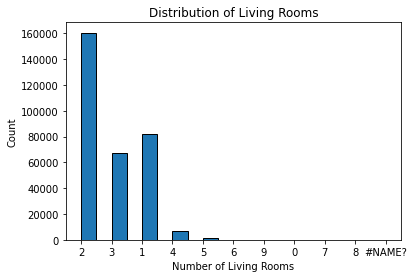

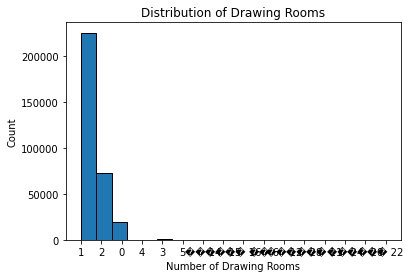

/home/ubuntu/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1450 (\N{HEBREW ACCENT YERAH BEN YOMO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Hebrew natively.
  fig.canvas.print_figure(bytes_io, **kw)


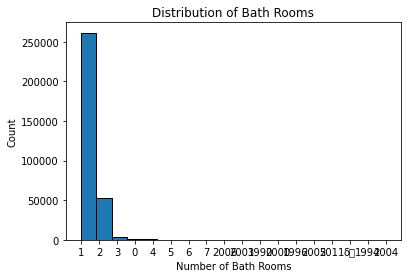

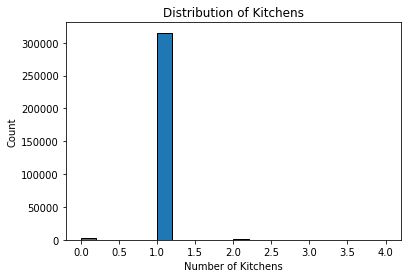

In [39]:
#import required libraries
import matplotlib.pyplot as plt
plt.hist(pandas_df['livingRoom'], bins=20, edgecolor='black')
plt.xlabel('Number of Living Rooms')
plt.ylabel('Count')
plt.title('Distribution of Living Rooms')
plt.show()



plt.hist(pandas_df['drawingRoom'], bins=20, edgecolor='black')
plt.xlabel('Number of Drawing Rooms')
plt.ylabel('Count')
plt.title('Distribution of Drawing Rooms')
plt.show()


plt.hist(pandas_df['bathRoom'], bins=20, edgecolor='black')
plt.xlabel('Number of Bath Rooms')
plt.ylabel('Count')
plt.title('Distribution of Bath Rooms')
plt.show()

plt.hist(pandas_df['kitchen'], bins=20, edgecolor='black')
plt.xlabel('Number of Kitchens')
plt.ylabel('Count')
plt.title('Distribution of Kitchens')
plt.show()




In [40]:
#plot trade Time
x_axis = pandas_df['tradeTime']
y_axis = pandas_df['price']
plt.plot(x_axis, y_axis)
plt.xlabel('Trade Time')
plt.ylabel('Average Price per Square')
plt.title('Average price over time')
plt.show()

KeyboardInterrupt: 

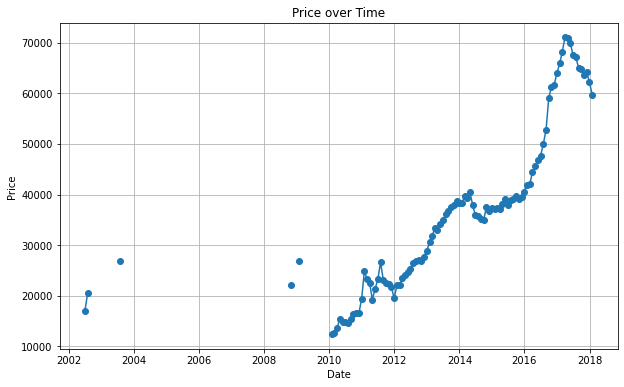

In [44]:
#plot monthly average price over the years
from pyspark.sql.functions import to_date
import pandas as pd
df = df.withColumn("tradeTime", to_date(df["tradeTime"], "yyyy-MM-dd"))
df = df.orderBy("tradeTime")

time_pdf = df.select("tradeTime", "price", "communityAverage").toPandas()


time_pdf['tradeTime'] = pd.to_datetime(time_pdf['tradeTime'])
time_pdf.set_index("tradeTime", inplace = True)

time_pdf = time_pdf.resample('M').mean()


plt.figure(figsize=(10, 6))
plt.plot(time_pdf.index, time_pdf["price"], marker='o')

plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Price over Time")
plt.grid(True)
plt.show()

In [ ]:
#plot building structure
plt.hist(pandas_df['buildingStructure'], bins=20, edgecolor='black')
plt.xlabel('Building Structure')
plt.ylabel('Count')
plt.title('Distribution of Building Structures')
plt.show()

In [ ]:
#box plot of elevator
pandas_df.boxplot(by = 'elevator', column = ['price'])

In [ ]:
#scatter plot of total price and square
plt.scatter(pandas_df['totalPrice'], pandas_df['square'])
plt.show()

## 2.4 Data Quality Verification

In [45]:
#check how many many null values are present in each column
from pyspark.sql.functions import col, sum
null_counts = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
null_counts.show()

+---+---+---+---+---+---------+---+---------+----------+-----+------+----------+-----------+-------+--------+-----+------------+----------------+-------------------+-----------------+-----------+--------+-----------------+------+--------+----------------+
|url| id|Lng|Lat|Cid|tradeTime|DOM|followers|totalPrice|price|square|livingRoom|drawingRoom|kitchen|bathRoom|floor|buildingType|constructionTime|renovationCondition|buildingStructure|ladderRatio|elevator|fiveYearsProperty|subway|district|communityAverage|
+---+---+---+---+---+---------+---+---------+----------+-----+------+----------+-----------+-------+--------+-----+------------+----------------+-------------------+-----------------+-----------+--------+-----------------+------+--------+----------------+
|  0|  0|  0|  0|  0|        0|  0|        0|         0|    0|     0|         0|          0|      0|       0|    0|           0|               0|                  0|                0|          0|      32|               32|    32|   

In [46]:
#check outliers using the IQR method

from pyspark.sql import functions as F
from pyspark.sql.types import IntegerType, FloatType, DoubleType

def find_outliers_iqr(df):
    # Get a list of numeric columns
    numeric_columns = [field.name for field in df.schema.fields if isinstance(field.dataType, 
                                                                              (IntegerType, FloatType, DoubleType))]
    
    outliers_count = {}
    for col_name in numeric_columns:
        # Calculate Q1 and Q3 for the column
        q1, q3 = df.approxQuantile(col_name, [0.25, 0.75], 0.0)
        
        # Calculate IQR
        iqr = q3 - q1
        
        # Define outlier boundaries
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Filter outliers for the column
        outliers = df.filter((df[col_name] < lower_bound) | (df[col_name] > upper_bound))
        outliers_count[col_name] = outliers.count()
        
    return outliers_count
        
       

find_outliers_iqr(df)     

{'Lng': 8128,
 'Lat': 6799,
 'followers': 31339,
 'totalPrice': 15730,
 'price': 11751,
 'square': 12078,
 'kitchen': 3561,
 'renovationCondition': 0,
 'buildingStructure': 0,
 'ladderRatio': 7256,
 'elevator': 0,
 'fiveYearsProperty': 0,
 'subway': 0,
 'district': 57330}

# 3. Data Cleaning

## 3.1 Select Data

In [47]:
#We will drop the rows with null values
df = df.dropna()
null_counts = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
null_counts.show()

+---+---+---+---+---+---------+---+---------+----------+-----+------+----------+-----------+-------+--------+-----+------------+----------------+-------------------+-----------------+-----------+--------+-----------------+------+--------+----------------+
|url| id|Lng|Lat|Cid|tradeTime|DOM|followers|totalPrice|price|square|livingRoom|drawingRoom|kitchen|bathRoom|floor|buildingType|constructionTime|renovationCondition|buildingStructure|ladderRatio|elevator|fiveYearsProperty|subway|district|communityAverage|
+---+---+---+---+---+---------+---+---------+----------+-----+------+----------+-----------+-------+--------+-----+------------+----------------+-------------------+-----------------+-----------+--------+-----------------+------+--------+----------------+
|  0|  0|  0|  0|  0|        0|  0|        0|         0|    0|     0|         0|          0|      0|       0|    0|           0|               0|                  0|                0|          0|       0|                0|     0|   

In [ ]:
#Verify the cleaned dataframe

df.show()

In [48]:
#Drop the outliers
def remove_outliers_iqr(df):
    # Get a list of numeric columns
    numeric_columns = [field.name for field in df.schema.fields if isinstance(field.dataType, 
                                                                              (IntegerType, FloatType, DoubleType))]
    
    for col_name in numeric_columns:
        # Calculate Q1 and Q3 for the column
        q1, q3 = df.approxQuantile(col_name, [0.25, 0.75], 0.0)
        
        # Calculate IQR
        iqr = q3 - q1
        
        # Define outlier boundaries
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Filter to remove outliers for the column
        df = df.filter((df[col_name] >= lower_bound) & (df[col_name] <= upper_bound))

    return df

df = remove_outliers_iqr(df)

df.show()

+--------------------+------------+----------+---------+-------------+----------+---+---------+----------+-----+------+----------+-----------+-------+--------+-----+------------+----------------+-------------------+-----------------+-----------+--------+-----------------+------+--------+----------------+
|                 url|          id|       Lng|      Lat|          Cid| tradeTime|DOM|followers|totalPrice|price|square|livingRoom|drawingRoom|kitchen|bathRoom|floor|buildingType|constructionTime|renovationCondition|buildingStructure|ladderRatio|elevator|fiveYearsProperty|subway|district|communityAverage|
+--------------------+------------+----------+---------+-------------+----------+---+---------+----------+-----+------+----------+-----------+-------+--------+-----+------------+----------------+-------------------+-----------------+-----------+--------+-----------------+------+--------+----------------+
|https://bj.lianji...|BJCP84309432|116.386555|  40.0865|1111027382546|2002-06-01|n

In [ ]:
def get_shape(df):
    num_rows = df.count()
    num_columns = len(df.columns)
    print(f"The shape of the DataFrame is: ({num_rows}, {num_columns})")



get_shape(df)

## 3.2 Constructing New Data

In [49]:
#Extract last two characters from the floor attribute
from pyspark.sql.functions import substring
df = df.withColumn('Floor Number', substring(df['floor'], -2, 2))

df.select('floor', 'Floor Number').show(5)

+-----+------------+
|floor|Floor Number|
+-----+------------+
| �� 9|           9|
|�� 26|          26|
|�� 21|          21|
|�� 20|          20|
| �� 6|           6|
+-----+------------+
only showing top 5 rows



In [50]:
#Construct district name attribute
from pyspark.sql.functions import when, col

# Define the district mapping
district_mapping = {1: 'Dong Cheng', 2: 'Feng Tai', 3: 'Tong Zhou', 4: 'Da Xing', 5: 'Fang Shan',
                    6: 'Chang Ping', 7: 'Chao Yao', 8: 'Hai Dian', 9: 'Shi Jing Shan',
                    10: 'Xi Cheng', 11: 'Ping Gu', 12: 'Men Tou Gou', 13: 'Shui Yi'}

# Create the mapping logic
df = df.withColumn("districtName", 
                   when(col("district") == 1, "Dong Cheng")
                   .when(col("district") == 2, "Feng Tai")
                   .when(col("district") == 3, "Tong Zhou")
                   .when(col("district") == 4, "Da Xing")
                   .when(col("district") == 5, "Fang Shan")
                   .when(col("district") == 6, "Chang Ping")
                   .when(col("district") == 7, "Chao Yao")
                   .when(col("district") == 8, "Hai Dian")
                   .when(col("district") == 9, "Shi Jing Shan")
                   .when(col("district") == 10, "Xi Cheng")
                   .when(col("district") == 11, "Ping Gu")
                   .when(col("district") == 12, "Men Tou Gou")
                   .when(col("district") == 13, "Shui Yi")
                   .otherwise("Unknown"))

# Show the 'district' and 'districtName' columns
df.select("district", "districtName").show(10)

+--------+------------+
|district|districtName|
+--------+------------+
|       6|  Chang Ping|
|       7|    Chao Yao|
|       7|    Chao Yao|
|       6|  Chang Ping|
|      10|    Xi Cheng|
|       7|    Chao Yao|
|       7|    Chao Yao|
|       7|    Chao Yao|
|       7|    Chao Yao|
|      10|    Xi Cheng|
+--------+------------+
only showing top 10 rows



In [ ]:
# Count the occurrences of each district name
district_name_counts = df.groupBy("districtName").count()

# Convert to Pandas DataFrame
district_name_counts_pd = district_name_counts.toPandas()

# Plot the bar chart
district_name_counts_pd.set_index('districtName').plot(kind='bar')

# Customize the plot
plt.title('Distribution of District Names')
plt.xlabel('District Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## 3.4 Data Integration

In [51]:
# had to merge datasets before 3.3

#first need to change attribute name of 'ID' to 'id' to match the two datasets
df_missing = df_missing.withColumnRenamed('ID', 'id')
df_missing.show(10)

#join the two dataframes using id
df = df.join(df_missing, "id", "inner")



+------------+--------------------+
|          id|Floor Height English|
+------------+--------------------+
|101086041636|              Middle|
|101086920653|              Middle|
|101087277815|              Middle|
|101087508625|              Middle|
|101087641313|              Middle|
|101087957433|              Middle|
|101088008763|              Middle|
|101088050742|              Middle|
|101088238072|              Middle|
|101088350722|              Middle|
+------------+--------------------+
only showing top 10 rows



In [ ]:
df.columns

In [52]:
#check null values in the integrated dateframe
null_counts = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
null_counts.show()

#There appears to be null values in Floor Height English
df = df.dropna()
null_counts = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
null_counts.show()

+---+---+---+---+---+---------+---+---------+----------+-----+------+----------+-----------+-------+--------+-----+------------+----------------+-------------------+-----------------+-----------+--------+-----------------+------+--------+----------------+------------+------------+--------------------+
| id|url|Lng|Lat|Cid|tradeTime|DOM|followers|totalPrice|price|square|livingRoom|drawingRoom|kitchen|bathRoom|floor|buildingType|constructionTime|renovationCondition|buildingStructure|ladderRatio|elevator|fiveYearsProperty|subway|district|communityAverage|Floor Number|districtName|Floor Height English|
+---+---+---+---+---+---------+---+---------+----------+-----+------+----------+-----------+-------+--------+-----+------------+----------------+-------------------+-----------------+-----------+--------+-----------------+------+--------+----------------+------------+------------+--------------------+
|  0|  0|  0|  0|  0|        0|  0|        0|         0|    0|     0|         0|          0

+---+---+---+---+---+---------+---+---------+----------+-----+------+----------+-----------+-------+--------+-----+------------+----------------+-------------------+-----------------+-----------+--------+-----------------+------+--------+----------------+------------+------------+--------------------+
| id|url|Lng|Lat|Cid|tradeTime|DOM|followers|totalPrice|price|square|livingRoom|drawingRoom|kitchen|bathRoom|floor|buildingType|constructionTime|renovationCondition|buildingStructure|ladderRatio|elevator|fiveYearsProperty|subway|district|communityAverage|Floor Number|districtName|Floor Height English|
+---+---+---+---+---+---------+---+---------+----------+-----+------+----------+-----------+-------+--------+-----+------------+----------------+-------------------+-----------------+-----------+--------+-----------------+------+--------+----------------+------------+------------+--------------------+
|  0|  0|  0|  0|  0|        0|  0|        0|         0|    0|     0|         0|          0

## 3.3 Coding Inconsistencies

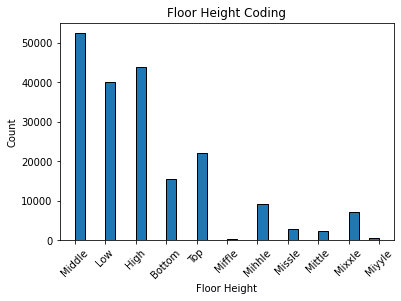

In [53]:
# check coding inconsistency in Floor Height English
pdf = df.toPandas()

plt.hist(pdf['Floor Height English'], bins=30, edgecolor='black')

# Customize the plot
plt.title('Floor Height Coding')
plt.xlabel('Floor Height')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [54]:
from pyspark.sql import functions as F
def makeConsistent(spark_df, column, searchWord, changeTo):
    return spark_df.withColumn(column, 
                               F.when(F.col(column) == searchWord, changeTo).otherwise(F.col(column)))



In [55]:
df = makeConsistent(df, "Floor Height English", "Miffle", "Middle")
df = makeConsistent(df, "Floor Height English", "Mihhle", "Middle")
df = makeConsistent(df, "Floor Height English", "Missle", "Middle")
df = makeConsistent(df, "Floor Height English", "Mittle", "Middle")
df = makeConsistent(df, "Floor Height English", "Mixxle", "Middle")
df = makeConsistent(df, "Floor Height English", "Miyyle", "Middle")



+---+---+---+---+---+---------+---+---------+----------+-----+------+----------+-----------+-------+--------+-----+------------+----------------+-------------------+-----------------+-----------+--------+-----------------+------+--------+----------------+------------+------------+--------------------+
| id|url|Lng|Lat|Cid|tradeTime|DOM|followers|totalPrice|price|square|livingRoom|drawingRoom|kitchen|bathRoom|floor|buildingType|constructionTime|renovationCondition|buildingStructure|ladderRatio|elevator|fiveYearsProperty|subway|district|communityAverage|Floor Number|districtName|Floor Height English|
+---+---+---+---+---+---------+---+---------+----------+-----+------+----------+-----------+-------+--------+-----+------------+----------------+-------------------+-----------------+-----------+--------+-----------------+------+--------+----------------+------------+------------+--------------------+
|  0|  0|  0|  0|  0|        0|  0|        0|         0|    0|     0|         0|          0

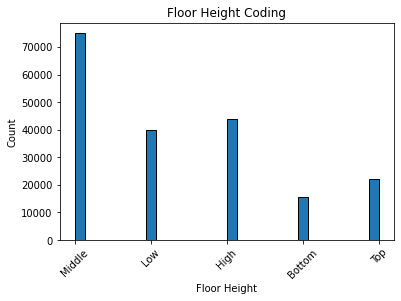

In [56]:
# check coding inconsistency in Floor Height English
pdf = df.toPandas()

plt.hist(pdf['Floor Height English'], bins=30, edgecolor='black')

# Customize the plot
plt.title('Floor Height Coding')
plt.xlabel('Floor Height')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [57]:
#rename attributes

df = df.withColumnRenamed('url', 'URL') \
       .withColumnRenamed('id', 'ID') \
       .withColumnRenamed('Lng', 'longitude') \
       .withColumnRenamed('Lat', 'latitude') \
       .withColumnRenamed('Cid', 'communityID') \
       .withColumnRenamed('DOM', 'daysOnMarket') \
       .withColumnRenamed('price', 'averagePricePerSquare') \
       .withColumnRenamed('square', 'totalSquare') \
       .withColumnRenamed('livingRoom', 'bedroom') \
       .withColumnRenamed('drawingRoom', 'livingRoom') \
       .withColumnRenamed('elevator', 'elevatorAccess') \
       .withColumnRenamed('subway', 'subwayAccess') \
       .withColumnRenamed('district', 'districtNumber')
     

df.printSchema()

root
 |-- ID: string (nullable = true)
 |-- URL: string (nullable = true)
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- communityID: long (nullable = true)
 |-- tradeTime: date (nullable = true)
 |-- daysOnMarket: string (nullable = true)
 |-- followers: integer (nullable = true)
 |-- totalPrice: double (nullable = true)
 |-- averagePricePerSquare: integer (nullable = true)
 |-- totalSquare: double (nullable = true)
 |-- bedroom: string (nullable = true)
 |-- livingRoom: string (nullable = true)
 |-- kitchen: integer (nullable = true)
 |-- bathRoom: string (nullable = true)
 |-- floor: string (nullable = true)
 |-- buildingType: string (nullable = true)
 |-- constructionTime: string (nullable = true)
 |-- renovationCondition: integer (nullable = true)
 |-- buildingStructure: integer (nullable = true)
 |-- Ladder Ratio: double (nullable = true)
 |-- elevatorAccess: double (nullable = true)
 |-- fiveYearsProperty: double (nullable = true)
 |-- subw

In [58]:
df = df.withColumnRenamed('Floor Number', 'floorNumber')
df = df.withColumnRenamed('Floor Height English', 'floorHeight')
df.printSchema()

root
 |-- ID: string (nullable = true)
 |-- URL: string (nullable = true)
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- communityID: long (nullable = true)
 |-- tradeTime: date (nullable = true)
 |-- daysOnMarket: string (nullable = true)
 |-- followers: integer (nullable = true)
 |-- totalPrice: double (nullable = true)
 |-- averagePricePerSquare: integer (nullable = true)
 |-- totalSquare: double (nullable = true)
 |-- bedroom: string (nullable = true)
 |-- livingRoom: string (nullable = true)
 |-- kitchen: integer (nullable = true)
 |-- bathRoom: string (nullable = true)
 |-- floor: string (nullable = true)
 |-- buildingType: string (nullable = true)
 |-- constructionTime: string (nullable = true)
 |-- renovationCondition: integer (nullable = true)
 |-- buildingStructure: integer (nullable = true)
 |-- Ladder Ratio: double (nullable = true)
 |-- elevatorAccess: double (nullable = true)
 |-- fiveYearsProperty: double (nullable = true)
 |-- subw

## 3.5 Formatting Data